#Importing Dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

#Training Image Preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 370 files belonging to 36 classes.


#Building Model

In [25]:
cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [34]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [35]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                 

In [37]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 180s 2s/step - loss: 3.8356 - accuracy: 0.0478 - val_loss: 3.3717 - val_accuracy: 0.0595
Epoch 2/32
98/98 [==============================] - 163s 2s/step - loss: 3.3427 - accuracy: 0.0745 - val_loss: 3.0765 - val_accuracy: 0.1378
Epoch 3/32
98/98 [==============================] - 162s 2s/step - loss: 3.0808 - accuracy: 0.1274 - val_loss: 2.5927 - val_accuracy: 0.2595
Epoch 4/32
98/98 [==============================] - 169s 2s/step - loss: 2.8664 - accuracy: 0.1624 - val_loss: 2.1704 - val_accuracy: 0.3243
Epoch 5/32
98/98 [==============================] - 164s 2s/step - loss: 2.6337 - accuracy: 0.2077 - val_loss: 1.8845 - val_accuracy: 0.4000
Epoch 6/32
98/98 [==============================] - 164s 2s/step - loss: 2.5037 - accuracy: 0.2520 - val_loss: 1.7851 - val_accuracy: 0.4892
Epoch 7/32
98/98 [==============================] - 169s 2s/step - loss: 2.3131 - accuracy: 0.3018 - val_loss: 1.7366 - val_accuracy: 0.4514
Epoch 8/32
98

#Evaluating Model

In [39]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 101s 952ms/step - loss: 0.1436 - accuracy: 0.9560
Training accuracy: 0.9560192823410034


#Saving Model

In [38]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
training_history.history #Return Dictionary of history

{'loss': [3.8355510234832764,
  3.3427000045776367,
  3.0807955265045166,
  2.8663690090179443,
  2.6336846351623535,
  2.5037083625793457,
  2.313067674636841,
  2.22944974899292,
  2.1030960083007812,
  1.9121885299682617,
  1.740249752998352,
  1.6224676370620728,
  1.4651275873184204,
  1.3048388957977295,
  1.1898488998413086,
  1.090519905090332,
  1.082319974899292,
  0.9046515822410583,
  0.8251169323921204,
  0.7297314405441284,
  0.7213875651359558,
  0.615786612033844,
  0.5131906270980835,
  0.552523672580719,
  0.4997180700302124,
  0.38584673404693604,
  0.3854205310344696,
  0.38311314582824707,
  0.34005337953567505,
  0.2907228469848633,
  0.3241490125656128,
  0.30726367235183716],
 'accuracy': [0.04783306643366814,
  0.07447832822799683,
  0.12744782865047455,
  0.16243980824947357,
  0.20770464837551117,
  0.2520064115524292,
  0.30176565051078796,
  0.3274478316307068,
  0.3659711182117462,
  0.41733548045158386,
  0.47351524233818054,
  0.5081862211227417,
  0.547

In [41]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [42]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#
Calculating Accuracy of Model Achieved on Validation set

In [43]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.21621370315552 %


#Accuracy Visualization
#Training Visualization

In [45]:
training_history.history['accuracy']

[0.04783306643366814,
 0.07447832822799683,
 0.12744782865047455,
 0.16243980824947357,
 0.20770464837551117,
 0.2520064115524292,
 0.30176565051078796,
 0.3274478316307068,
 0.3659711182117462,
 0.41733548045158386,
 0.47351524233818054,
 0.5081862211227417,
 0.547030508518219,
 0.6044943928718567,
 0.6359550356864929,
 0.6626003384590149,
 0.6635634303092957,
 0.7226324081420898,
 0.7544141411781311,
 0.7720706462860107,
 0.7804173231124878,
 0.8131621479988098,
 0.8365970849990845,
 0.8356340527534485,
 0.8529695272445679,
 0.877046525478363,
 0.8869984149932861,
 0.8844301700592041,
 0.8956661224365234,
 0.9091492891311646,
 0.8969502449035645,
 0.9065810441970825]

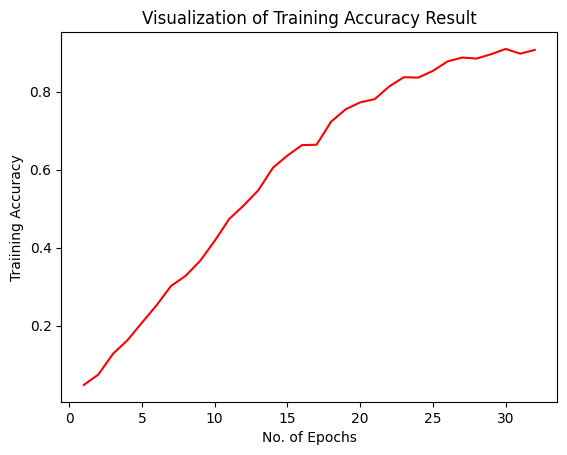

In [46]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

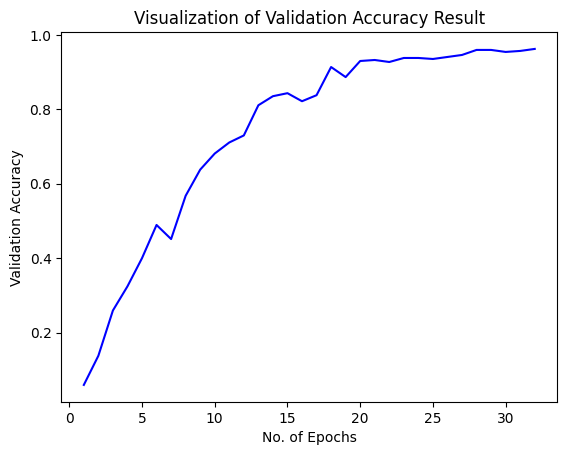

In [47]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 367 files belonging to 36 classes.


In [50]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 93s 2s/step - loss: 0.2168 - accuracy: 0.9619
Test accuracy: 0.9618528485298157
